# Models from Scratch: Linear Discriminant Analysis 
## *Implementation*
***

In [187]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [188]:
class LDA():
    
    def __init__(self, X, y_name):
        """
        Initalizes an LDA object
        
        Parameters: 
            X: A Dataframe object of only the relevant predictors and response.
            y_name: A string that corresponds to the name of the response variable
            
        """
        self.X = X
        self.y_name = y_name
        self.y = self.X[y_name]
        self.n = len(X)
        self.p = len(list(X))-1
        self.predictors = list(X)
        self.predictors.remove(y_name)
        self.num_classes = len(Counter(self.y))
        self.classes = list(Counter(self.y).keys())
        
    def discriminant(self, x):
        """Returns the set of discriminant scores for a feature vector x"""
        if len(x) != self.p:
            raise ValueError("Dimensional Error: feature vector x has dimension {} but model has {} predictors".format(len(x), self.p))
        if len(x) == 1:
            return self._discriminant_1d(x[0])
            
        cov = np.cov([self.X[p] for p in self.predictors])
        cov_inv = np.linalg.inv(cov)
        
        scores = dict()
        # Calculate discriminant score of x in each class
        for cls in self.classes:
            mean_vector = self.get_mean_vector(cls)
            a = np.dot(np.dot(np.transpose(x), cov_inv), mean_vector)
            b = np.dot(np.dot((1/2)*np.transpose(mean_vector), cov_inv), mean_vector)
            scores[cls] = (a - b)
            
        return scores
    
    def _discriminant_1d(self, x):
        """Returns the pair of discriminant scores when there is only 1 predictor"""
        scores = dict()
        # Calculate discriminant score of x in each class
        for cls in self.classes:
            mean = float(self.get_mean_vector(cls))
            variance = float(np.var(self.X))
            scores[cls] = (x*(mean/variance)) - ((mean**2)/(2*variance))
            
        return scores
    
    def classify(self, x):
        """Classifies an observation x by assigning it to the class that has a greater discriminant score."""
        scores = self.discriminant(x)
        maximum = max(scores.values())
        for cls in scores.keys():
            if scores[cls] == maximum:
                return cls
        return maximum
    
    def get_mean_vector(self, cls):
        """ Returns the mean_vector of all predictors given a class value 'cls' """
        mean_vector = []
        
        # Dataframe corresponding only to values of this class
        data  = self.X[self.X[self.y_name] == cls]
        
        # For each predictor, calculate its mean in the provided class
        for p in self.predictors:
            mean_vector.append(np.mean(data[p]))
            
        return np.array(mean_vector)
    
    def training_error(self):
        """Returns the training error for this LDA classifier."""
        incorrect = 0
        
        for index, row in self.X[self.predictors].iterrows():
            if self.classify(list(row)) != df[self.y_name][index]:
                incorrect += 1

        return incorrect / self.n
    

## *Application*
***

We'll use the College data and build a LDA model to classify whether or not a university is private or public.

In [189]:
df = pd.read_csv('./data/College.csv', index_col=0)
private = df[df['Private']=='Yes']  # All data for private unis
public = df[df['Private']=='No']  # All data for public unis

# Estimated prior probabilities (we won't use these because they're not at all representative of the population)
private_prior = len(private) / len(df)
public_prior = len(public) / len(df)

We'll use the following predictors: Outstate -- out of state tuition 
                                    perc.alumni -- percent of alumni who donate money
                                    Room.Board  -- room and board costs

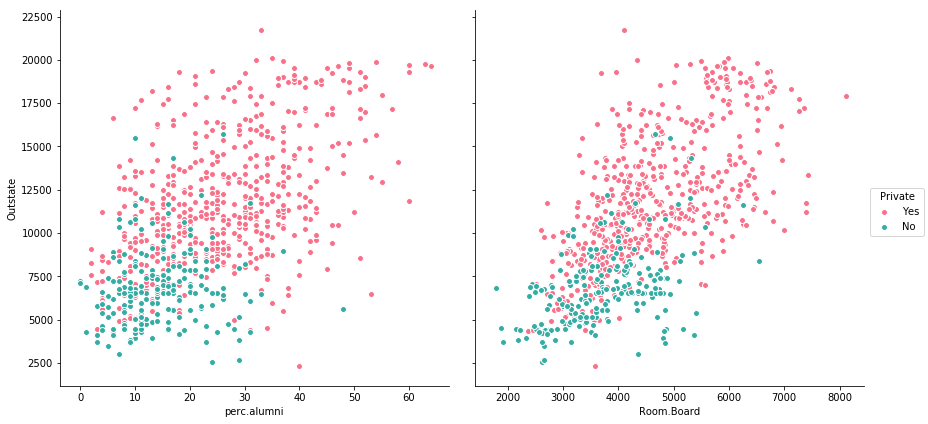

In [190]:
# Create pair-wise plot to visualize the seperation
sns.pairplot(x_vars=["perc.alumni", 'Room.Board'], y_vars=['Outstate'], data=df, hue="Private", size=6, palette="husl")

In [191]:
# Main dataframe of interest
X = df[["Private", "Outstate", "perc.alumni", "Room.Board"]].copy()

In [192]:
# Construct model
model = LDA(X, 'Private')

# Classify a university where Outstate = $10000, perc.alumni = 25%, and Room.Board = $9000
model.classify([10000, 25, 9000])

'Yes'

In [195]:
# Calculate training error 
model.training_error()

0.20077220077220076

*Notes*:
Generally, LDA (and QDA) assume that the conditional distribution of X given Y is normal. 
So in this case, we assume P(outstate, perc.alumni, room.board | y ∈ k) ~ Multivariate Normal, where k={private, public}. 
This should be investigated before applying the model.